In [1]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
mega_mask = pkl.load(open('pixel_em/5workers_rand0/obj1/mega_mask.pkl'))

### For the tiles that we care about in Pixel context, we don't care about which worker voted for which tile, all we care about is the property of the tile, e.g. distance, area ..etc 

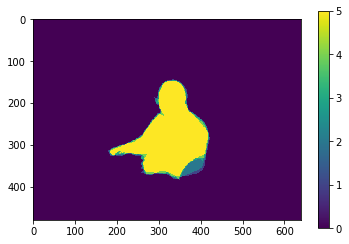

In [6]:
plt.imshow(mega_mask)
plt.colorbar()

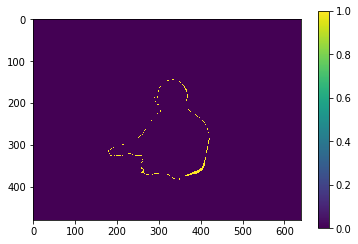

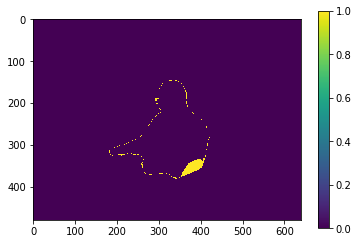

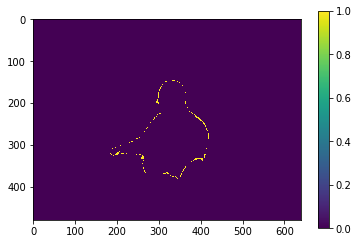

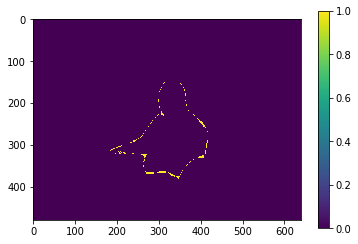

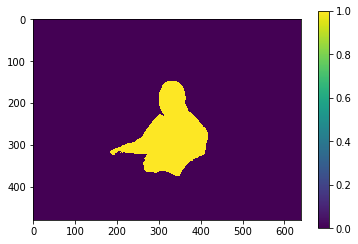

In [14]:
# Create masks for single valued tiles (so that they are more disconnected)
from matplotlib import _cntr as cntr
tiles = [] # list of coordinates of all the tiles extracted
unique_tile_values = np.unique(mega_mask)
# print unique_tile_values
for tile_value in unique_tile_values[1:]: #exclude 0
    singly_masked_img = np.zeros_like(mega_mask)
    for x,y in zip(*np.where(mega_mask==tile_value)):
        singly_masked_img[x][y]=1
    plt.figure()
    plt.imshow(singly_masked_img)
    plt.colorbar()
#     #Extract a set of contours from these masks
#     x, y = np.mgrid[:singly_masked_img.shape[0], :singly_masked_img.shape[1]]
#     c = cntr.Cntr(x, y, singly_masked_img)
#     # trace a contour at z ~= 1
#     res = c.trace(0.9)
#     #if PLOT: plot_trace_contours(singly_masked_img,res)
#     for segment in res:
#         if segment.dtype!=np.uint8 and len(segment)>2:
#             #Take the transpose of the tile graph polygon because during the tile creation process the xy was flipped
#             tile= Polygon(zip(segment[:,1],segment[:,0]))
#             # print tile.area
#             # if tile.area>=1: #FOR DEBUGGING PURPOSES
#             tiles.append(segment)


In [25]:
from skimage import measure
blobs = mega_mask==3
# all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

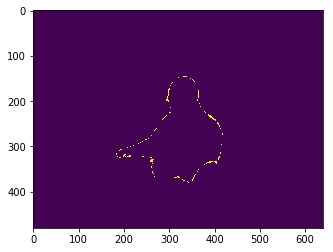

In [26]:
plt.imshow(mega_mask==3)

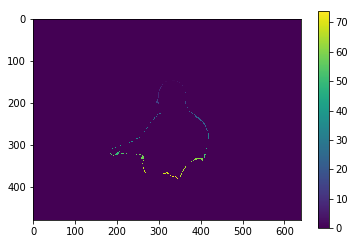

In [27]:
plt.imshow(blobs_labels)
plt.colorbar()

In [162]:
# Create masks for single valued tiles (so that they are more disconnected)
from skimage import measure
from matplotlib import _cntr as cntr
tiles = [] # list of masks of all the tiles extracted
tarea_mask = np.zeros_like(mega_mask)
unique_tile_values = np.unique(mega_mask)
# print unique_tile_values
for tile_value in unique_tile_values[1:]: #exclude 0
    blobs = mega_mask==tile_value
    blobs_labels = measure.label(blobs,background=0)
    for i in np.unique(blobs_labels)[1:]: 
        tile_mask = blobs_labels==i
        tile_pix = np.where(tile_mask==True)
        tiles.append(tile_mask)
        tarea_mask[tile_pix]=mask_area(tile_mask)
outside_area  = np.product(shape(tarea_mask))-np.unique(tarea_mask).sum()
tarea_mask[np.where(tarea_mask==0)]=outside_area

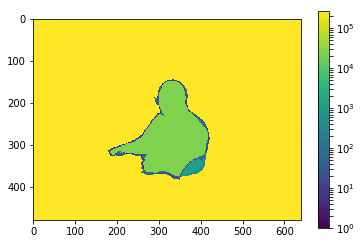

In [163]:
from matplotlib.colors import LogNorm
plt.imshow(tarea_mask, norm=LogNorm(vmin=1, vmax=np.max(tarea_mask)))
plt.colorbar()

In [77]:
def mask_area(mask):
    return len(np.where(mask)[0])

In [78]:
tarea = [mask_area(tile) for tile in tiles]

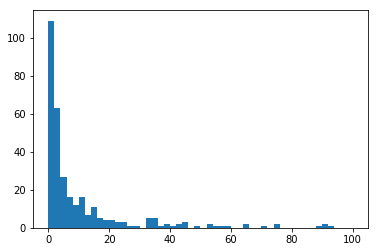

In [84]:
a = plt.hist(tarea,range=(0,100),bins=50)

In [42]:
blobs_labels = measure.label(mega_mask, background=0)

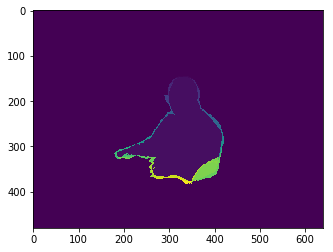

In [45]:
plt.imshow(blobs_labels)

In [48]:
len(np.unique(blobs_labels))

322

In [173]:
def create_tarea_mask(sample,objid):
    mega_mask = pkl.load(open('pixel_em/{}/obj{}/mega_mask.pkl'.format(sample,objid)))
    # Create masks for single valued tiles (so that they are more disconnected)
    from skimage import measure
    from matplotlib import _cntr as cntr
    tiles = [] # list of masks of all the tiles extracted
    tarea_mask = np.zeros_like(mega_mask)
    unique_tile_values = np.unique(mega_mask)
    # print unique_tile_values
    for tile_value in unique_tile_values[1:]: #exclude 0
        blobs = mega_mask==tile_value
        blobs_labels = measure.label(blobs,background=0)
        for i in np.unique(blobs_labels)[1:]: 
            tile_mask = blobs_labels==i
            tile_pix = np.where(tile_mask==True)
            tiles.append(tile_mask)
            tarea_mask[tile_pix]=mask_area(tile_mask)
    outside_area  = np.product(shape(tarea_mask))-np.unique(tarea_mask).sum()
    tarea_mask[np.where(tarea_mask==0)]=outside_area
    pkl.dump(tarea_mask,open("pixel_em/{}/obj{}/tarea.pkl".format(sample,objid),'w'))
    return tarea_mask

#####  rm -r tarea_mask.pkl 

In [174]:
def plot_tarea_mask(tarea_mask):
    from matplotlib.colors import LogNorm
    plt.imshow(tarea_mask, norm=LogNorm(vmin=1, vmax=np.max(tarea_mask)))
    plt.colorbar()

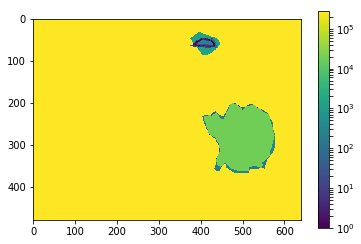

In [175]:
tarea_mask = create_tarea_mask('30workers_rand0',15)
plot_tarea_mask(tarea_mask)

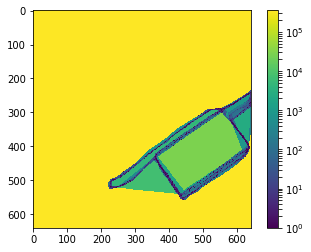

In [176]:
tarea_mask = create_tarea_mask('30workers_rand0',25)
plot_tarea_mask(tarea_mask)

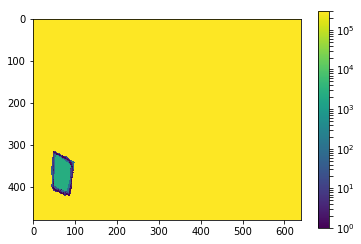

In [177]:
tarea_mask = create_tarea_mask('30workers_rand0',3)
plot_tarea_mask(tarea_mask)